# Backpropagation Lab





In [ ]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1 Avoiding Overfit: Early Stopping and Loss Regularization

### 1.1 (10%) No overfit avoidance
Train the sklearn [MLP classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff).  Use 3 output nodes (1 per class). Expanding the one output variable into 3 is called one-hot encoding or dummy variable encoding. There are lots of ways to implement this including the Pandas get_dummies method. This experiment is set up to run a little longer to better see the effects of overfit.  Be patient as there are lots of hidden nodes and a high max iterations setting.

Use default parameters except for the following:
- hidden_layer_sizes = [64] - One hidden layer with 64 hidden nodes
- activation = 'logistic'
- solver = 'sgd'
- alpha = 0
- batch_size = 1
- learning_rate_init = 0.01
- shuffle = True
- momentum = 0
- n_iter_no_change = 50
- max_iterations = 10000

Use a random 80/20 split of the data.  Run it a few times with different random training/test splits and give average values for
- Number of iterations until convergence
- Training set accuracy
- Test set accuracy
For one run observe the softmax probabilities on the test set using clf.predict_proba

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from scipy.io import arff
from sklearn.preprocessing import OneHotEncoder, LabelEncoder # Import LabelEncoder


iris_data = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(iris_data[0])
iris_df.head()


X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, -1].values

#error! solved from google colabs suggest!
label_encoder = LabelEncoder() # Create a LabelEncoder object
y = label_encoder.fit_transform(y) # Fit and transform the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = MLPClassifier(
    hidden_layer_sizes=(64,),
    activation='logistic',
    solver='sgd',
    alpha=0,
    batch_size=1,
    learning_rate_init=0.01,
    shuffle=True,
    momentum=0,
    n_iter_no_change=10000,
    max_iter=1000
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print("Iterations to converge:", clf.n_iter_)
print("Train accuracy:", round(train_accuracy, 4))
print("Test accuracy:", round(test_accuracy, 4))

#Number to convergence: 10000
#Training accuracy: 0.9833
#Test accuracy: 1.0000

#Number to convergence: 1000
#Training accuracy: 0.9917
#Test accuracy: 0.9333

#Iterations to converge: 1000
#Train accuracy: 0.9917
#Test accuracy: 0.9667


Iterations to converge: 1000
Train accuracy: 0.975
Test accuracy: 0.9667


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Discussion
In the markdown cell below, write about your experience training the MLP classifier. Things to cover in your discussion: How long did it take? What was your accuracy on the training set? What was your accuracy on the testing set? Do you see any evidence of overfitting? If so, what could be done to reduce the effects of overfitting?

I ran this cell about 7 times and I recorded the 2nd, 5th, and 7th traing accuracy and test accuracy. the training accuracy is higher than the test accuracy

### 1.2 (10%) Early Stopping (Validation Set)

- Do the same as above but this time with early stopping
- Use a validation set taken from the training set for your stopping criteria. Using 10-15% of the training set for a validation set is common. You do this simply by setting the MLPClassifier early_stopping, validation_fraction, and n_iter_no_change parameters.
- Run it a few times with different training/test splits and give average values for
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best validation score (MLPClassifer attribute best_validation_score_)
- For one run create a graph with validation set accuracy (*y*-axis) vs epochs (*x*-axis). Hint: MLPClassifer attribute validation_scores_

Note: Due to the simplicity of and lack of noise in the iris data set you will not see the accuracy improvements that early stopping or loss regularization can give for more complex noisy datasets.  In particular, early stopping will have lower than expected results because with a very small VS taken from a very small training set there is less data to train on and more variance with the VS score.  Thus, you will probably get lower accuracies for VS than normal training for this less typical case.  But at least you will get practice on using early stopping and loss regularization for future data sets.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Use a validation set taken from the training set for your stopping criteria.
#Using 10-15% of the training set for a validation set is common.
#You do this simply by setting the MLPClassifier early_stopping, validation_fraction,
#and n_iter_no_change parameters.

# Initialize the MLPClassifier
clf = MLPClassifier(
    early_stopping=True, #for the early stopping
    validation_fraction=0.15, #validation set
    hidden_layer_sizes=(64,),
    activation='logistic',
    solver='sgd',
    alpha=0,
    batch_size=1,
    learning_rate_init=0.01,
    shuffle=True,
    momentum=0,
    n_iter_no_change=50,
    max_iter=1000
)

# Train the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("test score", accuracy_score(y_test, y_pred))
print ("train score", clf.score(X_train, y_train))
print("num of iterations: ", clf.n_iter_)
print("best validation score", clf.best_validation_score_)

#forcing it to learn to 100000
# Number to convergence: 10000
#Training set accuracy: 0.9500
#Test set accuracy: 0.9667
#best validation score: 1.0000

#Iterations to converge: 53
#Train accuracy: 0.8833
#Test accuracy: 0.8667
#best validation score 1.0

#Iterations to converge: 65
#Train accuracy: 0.9583
#Test accuracy: 0.9333
#best validation score 1.0

#Iterations to converge: 60
#Train accuracy: 0.9583
#Test accuracy: 0.9667
#best validation score 1.0

#num of iterations:  348
#test score 0.8566142460684552
#train score 0.8748554244737451
#best validation score 0.8736517719568567



test score 0.8566142460684552
train score 0.8748554244737451
num of iterations:  348
best validation score 0.8736517719568567


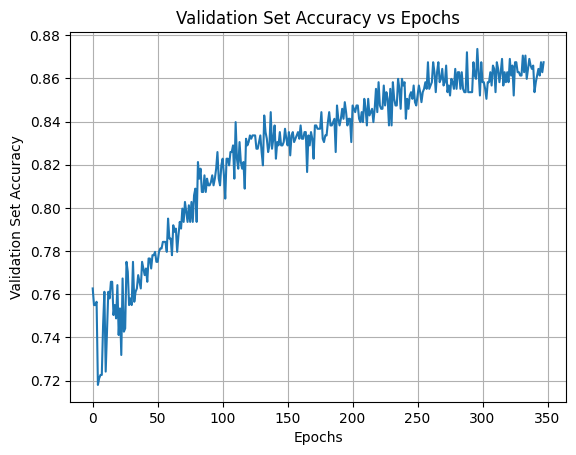

In [28]:
#For one run create a graph with validation set accuracy (y-axis) vs epochs (x-axis). Hint: MLPClassifer attribute validation_scores_
import matplotlib.pyplot as plt #kept getting an error bc forgetting to run first cell with this

plt.plot(clf.validation_scores_)
plt.xlabel('Epochs')
plt.ylabel('Validation Set Accuracy')
plt.title('Validation Set Accuracy vs Epochs')
plt.grid(True)
plt.show()

#### Discussion
Report on the average number of iterations until convergence. What is the effect of the use of the validation set and early stopping on training set accuracy and testing set accuracy? What do you attribute the performance change to? What do you see in the validation scores graph?

** Your discussion of average values above and the validation score graph **

### 1.3 (10%) Loss Regularization

- Do the same as in 1.1 but his time with loss regularization (Do not do early stopping)
- Run it with different L2 regularization parameter values (alpha).  The default for alpha is .0001.  Try other values such as .1, .01, .001, .00001, etc. Make a table with each row including:
    - The regularization parameter value
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best loss value (MLPClassifer attribute best_loss_)
- Which regularization value gave you the best results?
- For your best regularization value do one run and create a graph with loss (*y*-axis) vs epochs (*x*-axis) for the training set (Hint: MLPClassifer attribute loss_curve_)

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder

iris_data = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(iris_data[0])
iris_df.head()

X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, -1].values

label_encoder = LabelEncoder() # Create a LabelEncoder object
y = label_encoder.fit_transform(y) # Fit and transform the target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test alpha = 0.1
clf = MLPClassifier(
    hidden_layer_sizes=(64,),
    activation='logistic',
    solver='sgd',
    alpha=0.1,
    batch_size=1,
    learning_rate_init=0.01,
    shuffle=True,
    momentum=0,
    n_iter_no_change=10000,
    max_iter=10000,
    random_state=42
)
clf.fit(X_train, y_train)
print(f"Alpha: 0.1")
print(f"Iterations: {clf.n_iter_}")
print(f"Training Accuracy: {clf.score(X_train, y_train):.4f}")
print(f"Test Accuracy: {clf.score(X_test, y_test):.4f}")
print(f"Best Loss: {clf.best_loss_:.4f}")
print("-" * 50)

# Test alpha = 0.01
clf = MLPClassifier(
    hidden_layer_sizes=(64,),
    activation='logistic',
    solver='sgd',
    alpha=0.01,
    batch_size=1,
    learning_rate_init=0.01,
    shuffle=True,
    momentum=0,
    n_iter_no_change=10000,
    max_iter=10000,
    random_state=42
)
clf.fit(X_train, y_train)
print(f"Alpha: 0.01")
print(f"Iterations: {clf.n_iter_}")
print(f"Training Accuracy: {clf.score(X_train, y_train):.4f}")
print(f"Test Accuracy: {clf.score(X_test, y_test):.4f}")
print(f"Best Loss: {clf.best_loss_:.4f}")
print("-" * 50)

# Test alpha = 0.001
clf = MLPClassifier(
    hidden_layer_sizes=(64,),
    activation='logistic',
    solver='sgd',
    alpha=0.001,
    batch_size=1,
    learning_rate_init=0.01,
    shuffle=True,
    momentum=0,
    n_iter_no_change=10000,
    max_iter=10000,
    random_state=42
)
clf.fit(X_train, y_train)
print(f"Alpha: 0.001")
print(f"Iterations: {clf.n_iter_}")
print(f"Training Accuracy: {clf.score(X_train, y_train):.4f}")
print(f"Test Accuracy: {clf.score(X_test, y_test):.4f}")
print(f"Best Loss: {clf.best_loss_:.4f}")
print("-" * 50)

# Test alpha = 0.0001
clf = MLPClassifier(
    hidden_layer_sizes=(64,),
    activation='logistic',
    solver='sgd',
    alpha=0.0001,
    batch_size=1,
    learning_rate_init=0.01,
    shuffle=True,
    momentum=0,
    n_iter_no_change=10000,
    max_iter=10000,
    random_state=42
)
clf.fit(X_train, y_train)
print(f"Alpha: 0.0001")
print(f"Iterations: {clf.n_iter_}")
print(f"Training Accuracy: {clf.score(X_train, y_train):.4f}")
print(f"Test Accuracy: {clf.score(X_test, y_test):.4f}")
print(f"Best Loss: {clf.best_loss_:.4f}")
print("-" * 50)

# Test alpha = 0.00001
clf = MLPClassifier(
    hidden_layer_sizes=(64,),
    activation='logistic',
    solver='sgd',
    alpha=0.00001,
    batch_size=1,
    learning_rate_init=0.01,
    shuffle=True,
    momentum=0,
    n_iter_no_change=10000,
    max_iter=10000,
    random_state=42
)
clf.fit(X_train, y_train)
print(f"Alpha: 0.00001")
print(f"Iterations: {clf.n_iter_}")
print(f"Training Accuracy: {clf.score(X_train, y_train):.4f}")
print(f"Test Accuracy: {clf.score(X_test, y_test):.4f}")
print(f"Best Loss: {clf.best_loss_:.4f}")
print("-" * 50)

#Alpha: 0.1
#Iterations: 10000
#Training Accuracy: 0.7917
#Test Accuracy: 0.8000
#Best Loss: 0.8625

#Alpha: 0.01
#Iterations: 10000
#Training Accuracy: 0.9500
#Test Accuracy: 0.9667
#Best Loss: 0.3258

#Alpha: 0.001
#Iterations: 10000
#Training Accuracy: 0.9750
#Test Accuracy: 1.0000
#Best Loss: 0.0962

#Alpha: 0.0001
#Iterations: 7014
#Training Accuracy: 0.9833
#Test Accuracy: 1.0000
#Best Loss: 0.0517

#Alpha: 0.00001
#Iterations: 10000
#Training Accuracy: 0.9833
#Test Accuracy: 1.0000
#Best Loss: 0.0437


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha: 0.1
Iterations: 10000
Training Accuracy: 0.7917
Test Accuracy: 0.8000
Best Loss: 0.8625
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha: 0.01
Iterations: 10000
Training Accuracy: 0.9500
Test Accuracy: 0.9667
Best Loss: 0.3258
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha: 0.001
Iterations: 10000
Training Accuracy: 0.9750
Test Accuracy: 1.0000
Best Loss: 0.0962
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


Alpha: 0.0001
Iterations: 10000
Training Accuracy: 0.9833
Test Accuracy: 1.0000
Best Loss: 0.0517
--------------------------------------------------
Alpha: 0.00001
Iterations: 10000
Training Accuracy: 0.9833
Test Accuracy: 1.0000
Best Loss: 0.0437
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Discussion
Write about which regularization method gave you the best results and why you think that happened. Also compare: no regularization, early stopping, and L2 loss regularization.

** Your discussion **

## 2 Hyperparameters
In this section we use the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff) to consider the hyperparameters of learning rate, number of hidden nodes, and momentum.

### 2.1 (10%) Vowel Dataset Questions
- Give the baseline accuracies for the Iris and Vowel datasets. Baseline accuracy is what you would get if the model just outputs the majority class of the data set (i.e. the output value which occurs most often). These two data sets are not great examples for this as they have an equal amount of each class, which is not typical.
- Discuss why the vowel data set will probably have lower accuracy than Iris.
- Consider which of the vowel dataset's input features you should not use in training and discuss why.

The baseline accuracy is 33.3% for the Iris dataset (3 equal classes) and about 10% for the Vowel dataset (11 equal classes). The Vowel dataset will likely have lower accuracy than Iris because it has more classes and some vowel sounds are very similar, making classification harder. Features like speaker identity such as whether it is male or female or his/her name, should not be used in training because the model might memorize speakers instead of learning vowel patterns.

### 2.2 (10%) Learning Rate
Load the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff). Drop any features which you explained above as being inappropriate for training.

Hints: Consider the Pandas drop method for dropping columns. When you want to transform features in your data set there are lots of approaches. You could edit the arff file directly, or make the transforms in your code.  The Pandas replace method is nice for that. For example, if you wanted to change the vowel data set gender feature in a Pandas dataframe to 0/1 you could do the following:

vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8')   //Changes the byte code data into a normal string, b'Male' becomes "Male"\
vowel_df = vowel_df.replace('Male', 0)\
vowel_df = vowel_df.replace('Female', 1)

- Use one layer of hidden nodes with the number of hidden nodes being twice the number of inputs.
- Use a random 75/25 split of the data for the training/test set.
- Do not use early stopping.
- Try at least 5 different learning rates (LR) from very small (e.g. .001) to pretty big (e.g. 10). Each LR will require a different number of epochs to learn. LR effects both accuracy and time required for learning.
- Create a table which includes a row for each LR.  Your table columns should be LR, # epochs to learn the model, final training set accuracy and final test set accuracy.  As learning rates get smaller, it usually takes more epochs to learn. If your model is stopping learning too soon (converging) by hitting max_iterations (in this case and in experiments below), then you need to increase your max_iterations parameter in order to give your model more learning time.  To keep things faster, you don't need to increase max_iter past 1000 if you don't want to, but point out when more iterations may have given improvement.

In real testing one averages the results of multiple trials per LR (and other parameters) with different intitial conditions (training/test split, initial weights, etc.). That gives more accurate results but is not required for this lab.

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

vowel_data = arff.loadarff('vowel.arff')
vowel_df = pd.DataFrame(vowel_data[0])
vowel_df.head()

X = vowel_df.iloc[:, :-1].values
y = vowel_df.iloc[:, -1].values

label_encoder = LabelEncoder() # Create a LabelEncoder object
y = label_encoder.fit_transform(y) # Fit and transform the target variable

vowel_df = vowel_df.iloc[:, 1:] #drop the first column bc it is train/test

vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8') #Changes the byte code data into a normal string, b'Male' becomes "Male"
vowel_df['Speaker Number'] = vowel_df['Speaker Number'].str.decode('utf-8')

vowel_df = vowel_df.replace('Male', 0)
vowel_df = vowel_df.replace('Female', 1)
vowel_df['Speaker Number'] = vowel_df['Speaker Number'].astype('category').cat.codes

X = vowel_df.iloc[:, :-1].values # Features (everything except last column)
y = vowel_df.iloc[:, -1].values # Target (last column)

label_encoder = LabelEncoder() # Create a LabelEncoder object
y = label_encoder.fit_transform(y) # Fit and transform the target variable

#training with different learning rates!
learing_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10]
results = []
num_inputs = vowel_df.shape[1]

#table
results = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for lr in learing_rates:
  clf = MLPClassifier(
      hidden_layer_sizes=(64,),
      activation='logistic',
      solver='sgd',
      alpha=0,
      batch_size=1,
      learning_rate_init=lr, #best lr is 0.01
      shuffle=True,
      momentum=0,
      max_iter=1000,
      random_state=42
  )

  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  results.append({'LR': lr,
                    'num of epochs': clf.n_iter_,
                    'training score': clf.score(X_train, y_train),
                    'test score': accuracy_score(y_test, y_pred),
                    })

results = pd.DataFrame(results)
results.head(6)

#results

#Number of iterations until convergence: 2767
#Training set accuracy: 1.0000
#Test set accuracy: 0.9394

#0	0.0001	1000	0.527778	0.429293
#1	0.0010	1000	0.858586	0.757576
#2	0.0100	565	0.998737	0.939394 #best learning rate = 0.01
#3	0.1000	36	0.719697	0.626263
#4	1.0000	15	0.157828	0.161616
#5	10.0000	12	0.094697	0.075758



<ipython-input-7-446861b8b2dd>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vowel_df = vowel_df.replace('Female', 1)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,LR,num of epochs,training score,test score
0,0.0001,1000,0.527778,0.429293
1,0.0010,1000,0.858586,0.757576
2,0.0100,565,0.998737,0.939394
3,0.1000,36,0.719697,0.626263
4,1.0000,15,0.157828,0.161616
5,10.0000,12,0.094697,0.075758


#### Discussion
Discuss your table and the effect of different learning rates on both training time and accuracy

** Your discussion goes here **

### 2.3 (10%) Number of Hidden Nodes

Using the best LR you discovered, experiment with different numbers of hidden nodes.

- Start with 1 hidden node, then 2, and then double them for each test until you get no more improvement in accuracy.
- Create a table just like above, except with # of hidden nodes rather than LR.

In general, whenever you are testing a parameter such as # of hidden nodes, keep testing values until no more improvement is found. For example, if 20 hidden nodes did better than 10, you would not stop at 20, but would try 40, etc., until you no longer got improvement.

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

vowel_data = arff.loadarff('vowel.arff')
vowel_df = pd.DataFrame(vowel_data[0])
vowel_df.head()

X = vowel_df.iloc[:, :-1].values
y = vowel_df.iloc[:, -1].values

label_encoder = LabelEncoder() # Create a LabelEncoder object
y = label_encoder.fit_transform(y) # Fit and transform the target variable

vowel_df = vowel_df.iloc[:, 1:] #drop the first column bc it is train/test

vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8') #Changes the byte code data into a normal string, b'Male' becomes "Male"
vowel_df['Speaker Number'] = vowel_df['Speaker Number'].str.decode('utf-8')

vowel_df = vowel_df.replace('Male', 0)
vowel_df = vowel_df.replace('Female', 1)
vowel_df['Speaker Number'] = vowel_df['Speaker Number'].astype('category').cat.codes

X = vowel_df.iloc[:, :-1].values # Features (everything except last column)
y = vowel_df.iloc[:, -1].values # Target (last column)

label_encoder = LabelEncoder() # Create a LabelEncoder object
y = label_encoder.fit_transform(y) # Fit and transform the target variable

# Train with different numbers of hidden nodes
hidden_nodes = [2, 4, 8, 16, 32, 64]
results = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for h in hidden_nodes:
  clf = MLPClassifier(
      hidden_layer_sizes=h,
      activation='logistic',
      solver='sgd',
      alpha=0,
      batch_size=1,
      learning_rate_init=0.01, #best lr is 0.01
      shuffle=True,
      momentum=0,
      max_iter=1000,
      random_state=42
  )

  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  results.append({'Num Hidden Nodes': h,
                    'num of epochs': clf.n_iter_,
                    'training score': clf.score(X_train, y_train),
                    'test score': accuracy_score(y_test, y_pred),
                    })

results = pd.DataFrame(results)
results.head(6)

#Num Hidden Nodes	num of epochs	training score	test score
#0	2	150	0.527778	0.419192
#1	4	180	0.630051	0.535354
#2	8	200	0.781566	0.691919
#3	16	388	0.957071	0.878788
#4	32	406	0.988636	0.914141
#5	64	565	0.998737	0.939394 #best hidden node



<ipython-input-14-5def3a012f25>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vowel_df = vowel_df.replace('Female', 1)


,Num Hidden Nodes,num of epochs,training score,test score
0,2,150,0.527778,0.419192
1,4,180,0.630051,0.535354
2,8,200,0.781566,0.691919
3,16,388,0.957071,0.878788
4,32,406,0.988636,0.914141
5,64,565,0.998737,0.939394


#### Discussion
Discuss your table and the effect of different numbers of hidden nodes on both training time and accuracy

** Your discussion goes here **

### 2.4 (10%) Momentum

Try at least 5 different momentum terms between 0 and just less than 1 using the best number of hidden nodes and LR from your earlier experiments.

- Create a table just like above, except with momentum values rather than LR or number of hidden nodes.

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

vowel_data = arff.loadarff('vowel.arff')
vowel_df = pd.DataFrame(vowel_data[0])
vowel_df.head()

X = vowel_df.iloc[:, :-1].values
y = vowel_df.iloc[:, -1].values

label_encoder = LabelEncoder() # Create a LabelEncoder object
y = label_encoder.fit_transform(y) # Fit and transform the target variable

vowel_df = vowel_df.iloc[:, 1:] #drop the first column bc it is train/test

vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8') #Changes the byte code data into a normal string, b'Male' becomes "Male"
vowel_df['Speaker Number'] = vowel_df['Speaker Number'].str.decode('utf-8')

vowel_df = vowel_df.replace('Male', 0)
vowel_df = vowel_df.replace('Female', 1)
vowel_df['Speaker Number'] = vowel_df['Speaker Number'].astype('category').cat.codes

X = vowel_df.iloc[:, :-1].values # Features (everything except last column)
y = vowel_df.iloc[:, -1].values # Target (last column)

label_encoder = LabelEncoder() # Create a LabelEncoder object
y = label_encoder.fit_transform(y) # Fit and transform the target variable

# Train with different momentum values
momentums = [0, 0.1, 0.5, 0.9]
results = []

label_encoder = LabelEncoder() # Create a LabelEncoder object
y = label_encoder.fit_transform(y) # Fit and transform the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for m in momentums:
  clf = MLPClassifier(
      hidden_layer_sizes=64,  #best hn = 64
      activation='logistic',
      solver='sgd',
      alpha=0,
      batch_size=1,
      learning_rate_init=0.1, #best accuracy score = 0.1
      shuffle=True,
      momentum=m,
      max_iter=1000
  )
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  results.append({'Momentum': m,
                  'num of epochs': clf.n_iter_,
                  'training score': clf.score(X_train, y_train),
                  'test score': accuracy_score(y_test, y_pred),
                  })

results = pd.DataFrame(results)
results.head(6)

#
#Momentum	num of epochs	training score	test score
#0	0.0	30	0.695707	0.636364 #best momentum
#1	0.1	30	0.657828	0.590909
#2	0.5	31	0.510101	0.419192
#3	0.9	12	0.178030	0.116162


<ipython-input-13-622fec49eecf>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vowel_df = vowel_df.replace('Female', 1)


,Momentum,num of epochs,training score,test score
0,0.0,30,0.695707,0.636364
1,0.1,30,0.657828,0.590909
2,0.5,31,0.510101,0.419192
3,0.9,12,0.178030,0.116162


#### Discussion
Discuss your table and the effect of momentum on both training time and accuracy

** Your discussion goes here **

### 2.5 (10%) Automatic Hyperparameter Discovery
Using the vowel dataset, automatically adjust the LR, # of hidden nodes, and momentum using [grid and random search](https://scikit-learn.org/stable/modules/grid_search.html)
- For grid search include the most promising hyperparameter values you used in your experiments above.  You may add others also.
- Be patient as the grid search can take a while since it has to train all combinations of models. Don't use too many parameter options or it will be too slow.
- Report your best hyperparameters and accuracy.  Unfortunately, you will not always get as high a score as you might expect.  This is in part due to the simplicity of the dataset.  It also teaches that in gerneral you should not blindly assume that a tool will get you the results you expect, and that you may need to consider multiple approaches.

In [17]:
X = vowel_df.drop(columns=['Class'])
Y = vowel_df['Class']
le = LabelEncoder()
Y = le.fit_transform(y)

In [18]:
#Grid search for hyperparameters.
#Here is one variation of code you could use for your grid search. You can try your own variation if you prefer.

from sklearn.model_selection import GridSearchCV
clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
parameters = {'learning_rate_init':(.001, 0.01, 0.1), #You have to fill in the rest of your values for these lists
              'hidden_layer_sizes': ([16], [32], [64]),
              'momentum':(0, 0.1, 0.5) }
grid = GridSearchCV(clf, parameters)
grid.fit(X,Y)    #This takes a while to run
print(grid.best_params_)
print(grid.best_score_)

#{'hidden_layer_sizes': 64, 'learning_rate_init': 0.1, 'momentum': 0}
#0.5757575757575758

#{'hidden_layer_sizes': [16], 'learning_rate_init': 0.01, 'momentum': 0.5}
#0.48181818181818176

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


{'hidden_layer_sizes': [16], 'learning_rate_init': 0.01, 'momentum': 0.5}
0.48181818181818176


In [ ]:
#Randomized search for hyperparameters
#Here is one variation of code you could use for your randomized search.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
distributions = dict(learning_rate_init=uniform(loc=0.01, scale=.1), #loc is the min val, and loc + scale is the max val
                    hidden_layer_sizes = ([8], [16], [32], [64]), #since there is no distribution it samples these values uniformly
                    momentum=uniform(loc=0,scale =.99))
search = RandomizedSearchCV(clf, distributions, n_iter=10)
search.fit(X,Y)
print(search.best_params_)
print(search.best_score_)

#### Discussion
Write about and compare grid and randomized parameter search. How much time do they take? Which is more efficient or accurate? When should you use each?

** Your discussion goes here **

## 3 Regression with MLPs

### 3.1 (10%) - Learn a regression data set of your choice

Train MLP on any real world data set that requires regression (i.e. has a real valued ouput) and discuss your effort and results.  While the [Irvine ML Repository](https://archive.ics.uci.edu) is a great resource, also onsider [Kaggle](https://www.kaggle.com) and [OpenML](https://openml.org) as other great places to find datasets.
- Use [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) rather than MLPclassifier.  It has almost the exact same setup as MLPClassier except it uses the linear activation function for the output nodes and SSE as the loss function.  MLPClassier uses softmax activation for the output nodes and cross-entropy for the loss function.
- Use any reasonable hyperparameters that you want.  
- You will probably need to normalize input features.
- It is not typically necessary to normalize the output.
- Split into train and test and report the training and test set MAEs (Mean Absolute Error). For regression problems where we don't normalize the output, MAE is an intuitive measure as it shows exactly how much our output is off on average.

In [61]:
# Load and Learn a real world regression data set
# To calculate MAE you could do a variation of the following
#phoneme.arff

from sklearn.neural_network import MLPRegressor #using this instead of MLPClassifier
#from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

import kagglehub
file_path = "/root/.cache/kagglehub/datasets/iamsouravbanerjee/house-rent-prediction-dataset/versions/9/House_Rent_Dataset.csv"
df = pd.read_csv(file_path)
#/root/.cache/kagglehub/datasets/iamsouravbanerjee/house-rent-prediction-dataset/versions/9


# Display first few rows
print(df.head())

#Synposis of this code:
#classify sounds as either nasal (class 0) or oral (class 1)
#based on the amplitudes of the first five harmonics normalized by total energy for different phonemes.

#why:
#essential for speech recognition, linguistics, and phonetics research

#print(mean_absolute_error(clf.predict(X_test), y_test))

#result:

#V1	V2	V3	V4	V5	Class
#0	0.489927	-0.451528	-1.047990	-0.598693	-0.020418	b'1'
#1	-0.641265	0.109245	0.292130	-0.916804	0.240223	b'1'
#2	0.870593	-0.459862	0.578159	0.806634	0.835248	b'1'
#3	-0.628439	-0.316284	1.934295	-1.427099	-0.136583	b'1'
#4	-0.596399	0.015938	2.043206	-1.688448	-0.948127	b'1'

#V1 to V5 → first five harmonics normalized by total energy).


Path to dataset files: /root/.cache/kagglehub/datasets/iamsouravbanerjee/house-rent-prediction-dataset/versions/9
    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0      

In [31]:
X = phoneme_df.iloc[:, :-1].values # Features (everything except last column)
y = phoneme_df.iloc[:, -1].values # Target (last column)

label_encoder = LabelEncoder() # Create a LabelEncoder object
y = label_encoder.fit_transform(y) # Fit and transform the target variable

In [33]:
from sklearn.preprocessing import StandardScaler
#You will probably need to normalize input features.
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [41]:
#DEBUG TESTING THE SCALER
print("Before Scaling -h 5 lines:")
print(X_train[:5])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nAfter Scaling -h 5 lines:")
print(X_train_scaled[:5])  # Show scaled data

print("\nMean after Scaling:", X_train_scaled.mean(axis=0))  # Should be ~0
print("Standard Deviation after Scaling:", X_train_scaled.std(axis=0))  # Should be ~1



Before Scaling -h 5 lines:
[[-0.059828  0.297505  0.178015  0.088536  0.957706]
 [-0.793709 -0.869537 -0.005438  1.521558 -0.136583]
 [ 2.024936 -0.82082  -0.207951  0.096874  0.455759]
 [-0.832234 -0.368429 -0.359481  0.482845  1.758467]
 [ 1.671578  0.273088  0.140907  0.283032 -0.45736 ]]

After Scaling -h 5 lines:
[[-0.06429281  0.3076544   0.17630135  0.07637518  0.96096211]
 [-0.79442818 -0.86266715 -0.00771882  1.50286106 -0.12988859]
 [ 2.00983084 -0.81381325 -0.21085791  0.08467515  0.46059225]
 [-0.83275655 -0.36015097 -0.36285638  0.46888571  1.75920709]
 [ 1.65827633  0.28316878  0.13907863  0.26998407 -0.44965769]]

Mean after Scaling: [ 1.65904250e-17 -2.68888158e-17  7.00855571e-17  3.77522056e-18
  1.62180393e-17]
Standard Deviation after Scaling: [1. 1. 1. 1. 1.]


In [37]:
#training with MLP REGRESSOR
#Use any reasonable hyperparameters that you want.

#linear activation function for the output nodes and SSE as the loss function
mlp_regressor = MLPRegressor(hidden_layer_sizes=([64]),
                             activation='relu',
                             max_iter=10000,
                             random_state=42)
mlp_regressor.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=[64], max_iter=10000, random_state=42)

In [40]:
#Split into train and test and report the training and test set MAEs (Mean Absolute Error).
#For regression problems where we don't normalize the output,
#MAE is an intuitive measure as it shows exactly how much our output is off on average.

from sklearn.metrics import mean_absolute_error

y_train_pred = mlp_regressor.predict(X_train_scaled)
y_test_pred = mlp_regressor.predict(X_test_scaled)

train_MAE = mean_absolute_error(y_train, y_train_pred)
test_MAE = mean_absolute_error(y_test, y_test_pred)

print(f'Training MAE: {train_MAE:.3f}')
print(f'Test MAE: {test_MAE:.3f}')

#output
#Training MAE: 0.216
#Test MAE: 0.221

Training MAE: 0.216
Test MAE: 0.221


#### Discussion
Report on your choice of data set and your results. How does the MLPRegressor differ from the MLPClassifier? What are their respective uses? What lessons from above did you use?

** Your discussion goes here **

### 3.2 (10%) - Other MLP Hyperparameters
With the same data set, you may (not required) experiment with some of the hyperparameters you already did above (LR, hidden nodes, momentum, validation set parameters, regularization).  But for sure experiment with and discuss the results of the first two hyperparameters below (activation functions and multiple hidden layers).  We encourage you to experiment briefly with the others but they are not required.

- different hidden layer activation functions (tanh, relu in addition to logistic) - Note that Sklearn does not currently let you choose the output layer activation function.  It is automatically softmax for classification and linear for regression.
- more than one hidden layer
- solver - try adam and lbfgs in addition to sgd
- batch size
- learning rate adaptation - this is the schedule parameter which lets LR adapt during learning

In [ ]:
# Run with different hyperparameters

#### Discussion
How do the hyperparameters affect your accuracy? Specifically the number of layers and nodes and activation functions you experimented with. Do the solver, batch size, and learning rate adaptation affect anything?


** Your discussion goes here **

## 4. (Optional 20% extra credit) Code up your own MLP/Backprop learner
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to create a network structure with at least one hidden layer and an arbitrary number of nodes. You may choose just one non-linear activation function for all hidden and output nodes if you want (e.g. sigmoid activation function where the loss is SSE rather than cross-entropy).
- Random weight initialization with small random weights with 0 mean. Remember that every hidden and output node should have its own bias weight.
- Use stochastic training updates: update weights after each training instance (i.e. not batch)
- Option to include a momentum term
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the Iris data set above with your Backprop version. Show and discuss your results and how they compare with the sklearn version.
- Coding MLP is a good experience but is a little more challening than implementing other models so the extra credit points are higher than typical.

*Discuss your results and any differences*

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MLP(BaseEstimator,ClassifierMixin):

    def __init__(self,lr=.1, momentum=0, shuffle=True,hidden_layer_widths=None):
        """ Initialize class with chosen hyperparameters.

        Args:
            lr (float): A learning rate / step size.
            shuffle(boolean): Whether to shuffle the training data each epoch. DO NOT SHUFFLE for evaluation / debug datasets.
            momentum(float): The momentum coefficent
        Optional Args (Args we think will make your life easier):
            hidden_layer_widths (list(int)): A list of integers which defines the width of each hidden layer if hidden layer is none do twice as many hidden nodes as input nodes. (and then one more for the bias node)
            For example: input width 1, then hidden layer will be 3 nodes
        Example:
            mlp = MLP(lr=.2,momentum=.5,shuffle=False,hidden_layer_widths = [3,3]),  <--- this will create a model with two hidden layers, both 3 nodes wide
        """
        self.hidden_layer_widths
        self.lr = lr
        self.momentum = momentum
        self.shuffle = shuffle


    def fit(self, X, y, initial_weights=None):
        """ Fit the data; run the algorithm and adjust the weights to find a good solution

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Optional Args (Args we think will make your life easier):
            initial_weights (array-like): allows the user to provide initial weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """
        self.weights = self.initialize_weights() if not initial_weights else initial_weights

        return self

    def predict(self, X):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!

        Returns:

        """

        return [0]

    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets

        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        return 0

    ###  Returns the weights. Not required but helpful for debugging
    def get_weights(self):
        pass
